In [18]:
from graphviz import Digraph
colorPointer = 'grey'
colorRight = 'blue'
colorLeft = 'green'
colorHigh = 'red'

# https://www.evamariakiss.de/apps/bstlearner_v1.php
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
    def print(self):        
        print("TreeNode: %d" % (self.key))

class bst():
    def __init__(self):
        self.root = None # Root of the tree
        self.list = [] # Elements of the tree as list
    # Insert a key 
    def addNode_byValue(self, k):
        ''' Insert a key '''
        newNode = TreeNode(k)
        # If the tree is empty, the new node is the root
        if self.root == None:
            self.root = newNode
        elif not self.isNodeValue(k):
            x = self.root
            # Find parent node
            while x != None:
                p = x
                if newNode.key < x.key:
                    x = x.left
                elif newNode.key > x.key:
                    x = x.right
            # Set parent, left and right child for newNode 
            newNode.parent = p       
            if newNode.key < p.key:
                p.left = newNode
            else: 
                p.right = newNode
        
    def search(self, x, k):
        ''' Search for a key k starting at node x  '''
        if (x == None or x.key == k):
            return x
        if (k < x.key):
            return self.search(x.left, k)
        else: 
            return self.search(x.right, k)
    
    def isNodeValue(self, k):  
        if self.search(self.root, k) == None:
            return False
        else:
            return True
    
    def transplant(self, u, v):
        ''' Replace subtree u with subtree v '''
        if (u.parent == None):
            self.root = u
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        if v != None:
            v.parent = u.parent
            
    def tree_minimum(self, x):
        ''' Determine the smallest key in the subtree of x'''
        while (x.left != None):
            x = x.left
        return x;

    def findAdjacentNode(self, infoNodo):
        aux = self.search(self.root, infoNodo)
        lst = list()
        if aux != None:
            if aux.left != None:
                lst.append(aux.left.key)
            if aux.right != None:
                lst.append(aux.right.key)
        return lst

    def deleteNode_byValue(self, k):
        z = self.search(self.root, k)
        if z == None:
            return False
        else:
            self.delete(k)
            return True
    
    def delete(self, k):
        '''Delete node with key k from  tree ''' 
        z = self.search(self.root, k)
        if z == None:
            return
        if z.left == None: # case 1: z has no left child
            self.transplant(z, z.right)
        elif z.right == None: # case 2: z has no right child
            self.transplant(z, z.left)
        else: 
            y = self.tree_minimum(z.right) # determine smallest value in z.right
            if (y.parent != z):
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y
            if (z == self.root):
                self.root = y

    def getNodeValues(self, order='Preorder'):
        if order == 'Preorder':
            self.preorder_traversal(self.root)
        elif order == 'Inorder':
            self.inorder_traversal(self.root)
        else:
            self.postorder_traversal(self.root)
        
        return self.list

    def preorder_traversal(self, x):
        '''Inorder traversal of the tree: returns elements sorted by key '''
        if (x != None):
            if (x == self.root):
                self.list = []
            self.list.append(x.key)
            self.preorder_traversal(x.left)
            self.preorder_traversal(x.right)
    
    def inorder_traversal(self, x):
        '''Inorder traversal of the tree: returns elements sorted by key '''
        if (x != None):
            if (x == self.root):
                self.list = []
            self.inorder_traversal(x.left)
            self.list.append(x.key)
            self.inorder_traversal(x.right)

    def postorder_traversal(self, x):
        '''Postorder traversal of the tree: left child, right child, root '''
        if (x != None):
            if (x == self.root):
                self.list = []
            self.postorder_traversal(x.left)
            self.postorder_traversal(x.right)
            self.list.append(x.key)
            
    def visualize(self, lst = []):
        ''' Visualize the tree using graphviz '''
        tree = self.root
        # Recursively add nodes and edges
        def add_nodes_edges(tree, dot=None):
            col = "black"
            # Create Graphviz Digraph 
            if dot is None:
                dot = Digraph()
                dot.graph_attr = {
                    'rankdir': 'TB',
                    'center': 'true',
                    'size':'14,5',
                    'ratio':'auto'
                }
                dot.node(name='root', label='root', color = 'white', shape="circle", fixedsize="True", width="0.4")
                if (lst != [] and tree.key in lst):
                    dot.node(name=str(tree), label=str(tree.key), color = colorHigh, shape="circle", fixedsize="True", width="0.4")
                else:
                    dot.node(name=str(tree), label=str(tree.key), color = col, shape="circle", fixedsize="True", width="0.4")
                dot.edge('root', str(tree), color=colorPointer)                    
            # Add nodes recursively
            if tree.left:            
                if (lst != [] and tree.left.key in lst):
                    col = "red"  
                dot.node(name=str(tree.left), label=str(tree.left.key), 
                         color = col, shape="circle", fixedsize="True", width="0.4")
                col = "black"
                dot.edge(str(tree), str(tree.left),color=colorLeft)
                dot = add_nodes_edges(tree.left, dot=dot)               
            if tree.right:
                if (lst != [] and tree.right.key in lst): 
                    col = "red" 
                dot.node(name=str(tree.right), label=str(tree.right.key), 
                         color = col, shape="circle", fixedsize="True", width="0.4")
                col = "black"
                dot.edge(str(tree), str(tree.right), color=colorRight)
                dot = add_nodes_edges(tree.right, dot=dot)            
            return dot        
        return add_nodes_edges(tree)   

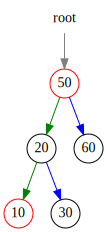

In [19]:
tree = bst()
tree.addNode_byValue(50)
tree.addNode_byValue(20)
tree.addNode_byValue(60)
tree.addNode_byValue(10)
tree.addNode_byValue(30)
dot = tree.visualize([50,10])
display(dot)